# Automatic Detection and Classification of Rock Microstructures through Machine Learning

## Author(s)
List authors, their current affiliations,  up-to-date contact information, and ORCID if available. Add as many author lines as you need. 

- Author1 = {"name": "Stephen Iota", "affiliation": "USC", "email": "iota@usc.edu", "orcid": ""}
- Author2 = {"name": "Junyi Liu", "affiliation": "USC", "email": "liujunyi@usc.edu", "orcid": ""}
- Author3 = {"name": "Ming Lyu", "affiliation": "USC", "email": "minglyu@usc.edu", "orcid": ""}
- Author4 = {"name": "Bolong Pan", "affiliation": "USC", "email": "bolongpa@usc.edu", "orcid": ""}
- Author5 = {"name": "Xiaoyu Wang", "affiliation": "USC", "email": "xwang93@usc.edu", "orcid": ""}
- Author6 = {"name": "Yolanda Gil", "affiliation": "USC", "email": "gil@isi.edu", "orcid": "0000-0001-8465-8341"}
- Author7 = {"name": "Wael AbdAlmageed", "affiliation": "USC", "email": "wamageed@isi.edu", "orcid": ""}
- Author8 = {"name": "Gurman Gill", "affiliation": "Sonoma State", "email": "gillg@sonoma.edu", "orcid": ""}
- Author9 = {"name": "Matty Mookerjee", "affiliation": "Sonoma State", "email": "matty.mookerjee@sonoma.edu", "orcid": ""}



## Purpose

**Motivation:** Geologists need help classifying microscope rock images of sigma clasts; a type of mantled porphyroclasts widely used as kinematic indicators in rocks. 

* Knowledge about the sheer sense of sigma clast during formation (either CCW or CW sheering) gives insights into rock formation history.  

**Challenge:** Very limited data set, difficult feature extraction.

- Only ~100 positive samples.
- Sigma-clasts and notoriously trickly to classify, even for geologists in the field.

## Technical contributions


- Exploring the use of Machine Learning models for fast analysis and classification of geology microstructure data.
- Developing a computational experimentation environment to visualize different CNN network layers, classification heatmaps, and comparative metrics.
- Creating a new web application to facilitate data collection and encourage participation in open-source science.

## Methodology

* Develop experimental framework to enable exploration of different models
* Integrate visualizaitons of models and results into the framework to facilitate understanding of different models
* Seek additional data, through data augmentation and open-source donations.

**Machine Learning (ML)**
- Powerful statistical tool that automatically finds patterns in a given dataset
- Once trained, an ML model can be used on new instances of data for automatic analysis

**Transfer Learning**
- Based on pre-trained CNN models to generate a new network
- Reuse some of the weights and layers in the previous models
- Compensate for defects of small amount of data when creating a brand new CNN network
- Models tested: 
    - YOLOV3 [1]
    - [ResNet50](files/resnet.png) [2]
    - [VGG19](files/vgg.png) [3]
    - [InceptionV3](files/inceptionv3.png) [4]

**Convolutional Neural Networks (CNNs)**
- [CNNs](files/sample_cnn.png) are a type of ML network that are modeled after the human brain, and typically outperform all other ML models when it comes to vision related tasks

## Results

This work reports on early investigation of machine learning techniques for automatic detection and classification of sigma clasts and their rotation from photomicrographs. 
Convolutional Neural Networks (CNNs) are used to extract and leverage defining features of sigma clasts, such as shape, color, texture, and tail direction to improve accuracy. 

We leverage existing models that are pre-trained on very large collections of images, and use transfer learning techniques to apply them to microstructure images. We also begin work to use YOLOv3 model to identify different sigma clasts in a given image. 

In order to facilitate exploration of different models with different settings, we are developing a computational experimentation environment to visualize different CNN network layers, classification heatmaps, and comparative metrics. 

Finally, since models perform better when more data are available, we are developing a web application to collect additional data from geoscientists and incentivize their participation in open science. 
The website allows researchers to upload images of rock microstructures, showing them the classification of the images based on the best models available, and allows them to correct any errors which can be used to improve the models. 

[Here is a link to a notebook of this code that has the original outputs in line with the code.](notebooks/Transfer_Learning_Ming_Lyu.ipynb) We encourage users to run the cells themselves for a better understanding of the results. Users can also upload their own data to use this notebook to train the same models for their own image classification problems.

Results from transfer learning models: 

![results](files/results.png)


## Funding
- No funding

## Keywords

keywords=["Sigma clast", "classification", "machine learning", "AI for geosciences", "CNNs for image classification"]

## Citation
S. Iota et al., Automatic Detection and Classification of Rock Microstructures through Machine Learning, EarthCube Annual Meeting, 2021

## Work In Progress - improvements

Notable TODOs:
- Data augmentation through synthetic images. Due to limited availabity of sigma-clast images, we are investigating adding synthetic images (created by hand or by script) into existing data to increase classification accuracy of our models.
- Integrate image recognition models with user website to provide users online automatic classification of sigma-clast data.
- Explore custom made Neural Network models

## Acknowledgements 

This notebook template extends the original notebook template provided with the jupytemplate extension [5]. It is a result of collaboration between the TAC Working Group and the EarthCube Office. 

The template is licensed under a <a href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License.</a>

# Setup

## Library import

In [ ]:
# Std library 
import os
import datetime
import tempfile
from pathlib import Path
from packaging import version
from glob import glob

# Data manipulation
import pandas as pd
import numpy as np
from numpy import expand_dims

# ML models
import keras
import tensorflow as tf
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import ResNet50,VGG19,InceptionV3
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Model
from keras.optimizers import Adam
from keras.applications.resnet import preprocess_input as resnet_preprocess_input
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.inception_v3 import preprocess_input as v3_preprocess_input
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

# Visualizations and display
import tensorboard
import matplotlib.pyplot as plt
#import imutils
#import cv2
from IPython.display import Image,display
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils

# Load the TensorBoard notebook extension.
%load_ext tensorboard
# Inline plots
%matplotlib inline


# Data import

We have limited data. There are about 100 images of rock structures with sigma-clasts, and about 800 sample images without any simga-clasts.


In [ ]:
data_path = Path("./original_data")

In [ ]:
sample_cw = load_img(data_path/"CW/5_muscovite_mica_fish_menderes.jpg")
plt.imshow(sample_cw)
plt.show()

In [ ]:
sample_ccw = load_img(data_path/"CCW/granatofisch(1).jpg")
plt.imshow(sample_ccw)
plt.show()

# Data processing and analysis

## Main code and results matrix 

In [ ]:
class transfer_learning_model:

  def __init__(self, num_class, model_name):
          self.num_class = num_class
          self.model_name = model_name
          self.regularize = False

  # We download an instance of ResNet50, a image recognition network, with the setting include_top=False, 
  # which cuts off the last layer of the CNN, which is the layer that takes all the processing of the 
  # previous layers, and outputs a final prediction of what category the network believes the image to be. 

  # The key insight of transfer learning is that because our problem, distinguishing two types of images, 
  # is similar to recognizing images in general, we can building off of powerful pre-trained networks to 
  # vastly speed up training of and improve our network.

  def construct_model(self,trainable):
    if self.model_name == "VGG19":
      base_model=VGG19(weights='imagenet',include_top=False)
    elif self.model_name == "ResNet50":
      base_model=ResNet50(weights='imagenet',include_top=False)
    elif self.model_name == "InceptionV3":
      base_model = InceptionV3(weights='imagenet',include_top=False)

    # Freeze weights of pretrained model
    base_model.trainable = trainable
    newOutput=base_model.output

    # Now we have a network without a final layer, we need to build it. 
    # The most important thing to recognise is that, in the last layer of 
    # the new output, we make there be num_class (for our case is 2) nodes, 
    # because we have two classification categories. 

    newOutput=GlobalAveragePooling2D()(newOutput)
    newOutput=Dense(1024,activation='relu')(newOutput)
    preds=Dense(self.num_class ,activation='softmax')(newOutput) #final layer with softmax activation

    # now we simply stitch together the premade CNN with our new last layers, and we have the form of our network.
    model=Model(inputs=base_model.input,outputs=preds)

    # We can now print the layer names in our model, and we see the last four layers are the new dense layers we just added.
    model.summary()
    self.model = model

  def train(self,model,folder_path,preprocess_input,epochs = 20):
    # we use a keras library to convert our pictures into a format the model can use.
    # train, test split with ratio 0.8:0.2
    image_generator=ImageDataGenerator(preprocessing_function = preprocess_input,validation_split=0.2)
    train_generator=image_generator.flow_from_directory(folder_path,
                            target_size=(224,224),
                            color_mode='rgb',
                            batch_size=32,
                            class_mode='categorical',
                            subset="training",
                            shuffle=True)
    
    validation_generator = image_generator.flow_from_directory(folder_path,
                            target_size=(224,224),
                            color_mode='rgb',
                            batch_size=32,
                            class_mode='categorical',
                            subset="validation",
                            shuffle=True)
    
    # Now we can train the new layers we have added on our data.
    checkpt = ModelCheckpoint(filepath = "models/" + str(self.model_name) + "/" +
                              str(self.model_name + "_epochs{epoch:02d}_train_acc-{accuracy:.4f}_val_acc-{val_accuracy:.4f}_"
                              + "Regularized-" + str(self.regularize) + ".h5"),
                              save_best_only=True,
                              verbose=1,monitor='val_accuracy',
                              mode='max')
    logdir = os.path.join("models/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    self.model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    # step_size_train=train_generator.n//train_generator.batch_size
    self.model.fit_generator(generator=train_generator,
                   validation_data=validation_generator,
                   epochs=epochs,
                   callbacks=[checkpt,tensorboard_callback])
    
    # Now we have an output, we can intepret the results. There are two metrics 
    # we get from our model, accuracy and loss. Accuracy is self explanitory, 
    # a measure of how many images the model categorized correctly. 
    # Loss is a measure of how many mistakes the model made, 
    # with a minimum of 0. In general, lower loss is better. 

  def add_regularization(self,regularizer=tf.keras.regularizers.l2(0.0001)):

    if not isinstance(regularizer, tf.keras.regularizers.Regularizer):
      print("Regularizer must be a subclass of tf.keras.regularizers.Regularizer")

    for layer in self.model.layers:
        for attr in ['kernel_regularizer']:
            if hasattr(layer, attr):
              setattr(layer, attr, regularizer)

    # When we change the layers attributes, the change only happens in the model config file
    model_json = self.model.to_json()

    # Save the weights before reloading the model.
    tmp_weights_path = 'tmp_weights.h5'
    self.model.save_weights(tmp_weights_path)

    # load the model from the config
    self.model = tf.keras.models.model_from_json(model_json)
    
    # Reload the model weights
    self.model.load_weights(tmp_weights_path, by_name=True)
    self.regularize = True


In [ ]:
def generate_train_val_generator(folder_path,preprocess_input):
  image_generator=ImageDataGenerator(preprocessing_function = preprocess_input,validation_split=0.2)
  train_generator=image_generator.flow_from_directory(folder_path,
                            target_size=(224,224),
                            color_mode='rgb',
                            batch_size=32,
                            class_mode='categorical',
                            subset="training",
                            shuffle=False)
    
  validation_generator = image_generator.flow_from_directory(folder_path,
                            target_size=(224,224),
                            color_mode='rgb',
                            batch_size=32,
                            class_mode='categorical',
                            subset="validation",
                            shuffle=False)
  return train_generator,validation_generator

def evaluate_model(model,train_generator,validation_generator):
    scoreSeg_train = model.evaluate(train_generator)
    scoreSeg_validation = model.evaluate(validation_generator)

    return scoreSeg_train,scoreSeg_validation

def generate_metric_frame(model_path_list,preprocess_input_list,folder_path,metrics_df):
  for i in range(len(model_path_list)):
    model_path = model_path_list[i]
    preprocess_function = preprocess_input_list[i]
    model = keras.models.load_model(model_path)
    train_generator,validation_generator = generate_train_val_generator(folder_path,preprocess_function)
    train_stats, val_stats = evaluate_model(model,train_generator, validation_generator)
    train_loss, train_acc, val_loss, val_acc = round(train_stats[0],3),round(train_stats[1],3),round(val_stats[0],3),round(val_stats[1],3)

    y_pred = model.predict(validation_generator,verbose=1)
    y_pred_bool = np.argmax(y_pred, axis=1)
    y_test = validation_generator.classes
    f1_score = classification_report(y_test, y_pred_bool,output_dict=True,digits = 3)
    f1_score_df = pd.DataFrame(f1_score).T.fillna(0).round(decimals=3)
    column = f1_score_df.columns.tolist()
    column.insert(0,"metric")
    f1_score_df_list = np.array(f1_score_df).tolist()
    f1_score_df_list.insert(0,column)
    f1_score_df_list

    temp_df = pd.DataFrame([[model_path.split("/")[-1],train_loss, train_acc, val_loss, val_acc, f1_score_df_list]],
                              columns= column_names)
    metrics_df = metrics_df.append(temp_df,ignore_index=True)
    
  return metrics_df

### ResNet50

In [ ]:
model=transfer_learning_model(3,"ResNet50")
model.construct_model(False)
model.train(model,data_path,resnet_preprocess_input,50)

In [ ]:
model=transfer_learning_model(3,"ResNet50")
model.construct_model(True)
model.add_regularization()
model.train(model,data_path,resnet_preprocess_input,50)

### VGG19

In [ ]:
model=transfer_learning_model(3,"VGG19")
model.construct_model(False)
model.train(model,data_path,vgg19_preprocess_input,50)

In [ ]:
model=transfer_learning_model(3,"VGG19")
model.construct_model(True)
model.add_regularization()
model.train(model,data_path,vgg19_preprocess_input,50)

### InceptionV3

In [ ]:
model=transfer_learning_model(3,"InceptionV3")
model.construct_model(False)
model.train(model,data_path,v3_preprocess_input,200)

In [ ]:
model=transfer_learning_model(3,"InceptionV3")
model.construct_model(True)
model.add_regularization()
model.train(model,data_path,v3_preprocess_input,50)

### YOLOV3



Here are our results from implementing the YOLOV3 model on our dataset. [Link to notebook]('./notebooks/YOLO.ipynb')

- Dataset (100 pictures with sigma clasts; 100 without)
- Training set (180 pictures)
- Independent test set (10 without sigma clasts; 
- 5 clockwise; 5 counterclockwise) 
- Perfectly distinguish non-sigma clasts
- Limited detection capabilities for sigma clasts
    - Miss small sigma clasts (major)
- Improvements:
    - YOLOv5
    - Tail detection to do CW/CCW classification


## Results Comparison  and Analysis

In [ ]:
super_path = 'models'
model_path_list = [os.path.join(super_path,'InceptionV3/InceptionV3_epochs132_train_acc-0.9939_val_acc-0.8250_Regularized-False.h5'),
           os.path.join(super_path,'InceptionV3/InceptionV3_epochs18_train_acc-0.9693_val_acc-0.7250_Regularized-True.h5'),
           os.path.join(super_path,"ResNet50/ResNet50_epochs20_train_acc-0.9264_val_acc-0.6250_Regularized-True.h5"),
           os.path.join(super_path,"ResNet50/ResNet50_epochs02_train_acc-0.8221_val_acc-0.8250_Regularized-False.h5"),
           os.path.join(super_path,"VGG19/VGG19_epochs14_train_acc-0.9939_val_acc-0.6250_Regularized-False.h5"),
           os.path.join(super_path,"VGG19/VGG19_epochs35_train_acc-0.5215_val_acc-0.6000_Regularized-True.h5")      
           ]
preprocess_input_list = [v3_preprocess_input,
              v3_preprocess_input,
              resnet_preprocess_input,
              resnet_preprocess_input,
              vgg19_preprocess_input,
              vgg19_preprocess_input]

In [ ]:
column_names = ["model","train_loss","train_acc","val_loss","val_acc","f1_score"]
metrics_df = pd.DataFrame(columns= column_names)
pd.set_option('display.max_colwidth', None)

In [ ]:
metrics_df = generate_metric_frame(model_path_list,preprocess_input_list,folder_path,metrics_df)

In [ ]:
metrics_df.sort_values(by=["val_acc","train_acc"],ascending=False)

### YOLOV3

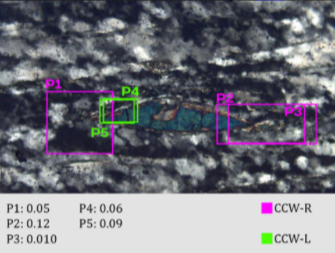


Here are our results from implementing the YOLOV3 model on our dataset: [link to notebook](./notebooks/YOLO.ipynb). We plan on implementing the code directly into this notebook in the near future. Currently, we are in the process of adapting the BinderHub project to support the implementation of this algorithm. Until then, we present our code in a separete notebook.

- Dataset (100 pictures with sigma clasts; 100 without)
- Training set (180 pictures)
- Independent test set (10 without sigma clasts; 
- 5 clockwise; 5 counterclockwise) 
- Perfectly distinguish non-sigma clasts
- Limited detection capabilities for sigma clasts
    - Miss small sigma clasts (major)
- Improvements:
    - YOLOv5
    - Tail detection to do CW/CCW classification


## Website

Currently, we are working to improve the [current website](https://sigmaclast.mint.isi.edu/) design to collect additional data.
- Create an open-source repository of rock microphotograph data
- Geologists may be interested in volunteering their data; Data scientists may want to try their hand at this difficult dataset
- Design a better website UI, integrate classification algorithms to run in real time upon data submission


# References
1. YOLO: https://pjreddie.com/media/files/papers/YOLOv3.pdf
2. ResNet: https://arxiv.org/pdf/1512.03385.pdf
3. VGG: https://arxiv.org/pdf/1409.1556.pdf
4. Inception: https://arxiv.org/pdf/1512.00567.pdf